## California Housing Price Prediction .

#### Background of Problem Statement :

The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

#### Problem Objective :

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

__Domain:__ Finance and Housing

__Analysis Tasks to be performed:__

1. Build a model of housing prices to predict median house values in California using the provided dataset.

2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.

3. Predict housing prices based on median_income and plot the regression chart for it.


__Dataset Description :__

    Field	Description
    longitude	(signed numeric - float) : Longitude value for the block in California, USA
    latitude	(numeric - float ) : Latitude value for the block in California, USA
    housing_median_age	(numeric - int ) : Median age of the house in the block
    total_rooms	(numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block
    total_bedrooms	(numeric - float ) : Count of the total number of bedrooms in all houses in the block
    population	(numeric - int ) : Count of the total number of population in the block
    households	(numeric - int ) : Count of the total number of households in the block
    median_income	(numeric - float ) : Median of the total household income of all the houses in the block
    ocean_proximity	(numeric - categorical ) : Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'  ]
    median_house_value	(numeric - int ) : Median of the household prices of all the houses in the block

### 1. Load the data :

    Read the “housing.csv” file from the folder into the program.
    Print first few rows of this data.
    Extract input (X) and output (Y) data from the dataset.

In [1]:
import pandas as pd

In [2]:
housing = pd.read_excel("../../Data/housing.xlsx")

In [3]:
housing.shape

(20640, 10)

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [5]:
X = housing.iloc[:, :-1]
Y = housing.iloc[:, -1]

### 2. Handle missing values :

    Fill the missing values with the mean of the respective column.

In [6]:
X.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
ocean_proximity       False
dtype: bool

In [7]:
X = X.fillna(X.mean())

### 3. Encode categorical data :

    Convert categorical column in the dataset to numerical data.

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
proximity_code = {k:v for k, v in zip(X.ocean_proximity.unique(), le.fit_transform(X.ocean_proximity.unique()))}
proximity_code

{'NEAR BAY': 3, '<1H OCEAN': 0, 'INLAND': 1, 'NEAR OCEAN': 4, 'ISLAND': 2}

In [9]:
X.ocean_proximity = X.ocean_proximity.apply(lambda k: proximity_code[k])

In [10]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3


### 4. Split the dataset : 

    Split the data into 80% training dataset and 20% test dataset.

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
x_train.shape, y_train.shape

((16512, 9), (16512,))

In [13]:
x_test.shape, y_test.shape

((4128, 9), (4128,))

### 5. Standardize data :

    Standardize training and test datasets.

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [15]:
x_train[:, 3].std()

1.0

### 6. Perform Linear Regression : 

    Perform Linear Regression on training data.
    Predict output for test dataset using the fitted model.
    Print root mean squared error (RMSE) from Linear Regression.
                [ HINT: Import mean_squared_error from sklearn.metrics ]

In [16]:
from sklearn.linear_model import LinearRegression
lineReg = LinearRegression()
lineReg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
lineReg.intercept_

206651.41478924398

In [18]:
lineReg.coef_

array([-85980.51507509, -90917.26131738,  14506.88756014, -14608.10112299,
        34283.30827817, -43697.83249357,  29216.59985449,  75226.84774383,
          185.7218755 ])

In [19]:
y_pred = lineReg.predict(x_test)
y_pred

array([207828.05847293, 211049.10949279, 247653.16373129, ...,
       279440.12525049, 224393.76782634, 221856.15742047])

In [20]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_pred,y_test)

4699083418.277728

In [21]:
pd.DataFrame(y_pred,y_test)

,0
median_house_value,
171300,207828.058473
414800,211049.109493
350000,247653.163731
137100,148516.822398
60900,114800.359355
...,...
150000,121744.049221
500001,383196.794756
288300,279440.125250


In [22]:
# test_1 = scaler.transform([#new row of x])
test_1 = x_test[4:5]

In [23]:
lineReg.predict(test_1)

array([114800.35935532])

### 7. Bonus exercise: Perform Linear Regression with one independent variable :

    Extract just the median_income column from the independent variables (from X_train and X_test).
    Perform Linear Regression to predict housing values based on median_income.
    Predict output for test dataset using the fitted model.
    Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.

In [24]:
x_feature = pd.DataFrame(housing.median_income)
y_target = housing.median_house_value

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_feature, y_target, test_size=0.2)

In [26]:
x_train.shape, x_test.shape

((16512, 1), (4128, 1))

In [27]:
y_train.shape, y_test.shape

((16512,), (4128,))

In [28]:
from sklearn.linear_model import LinearRegression
lineReg = LinearRegression()
lineReg.fit(x_train,y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
y_pred = lineReg.predict(x_test)
y_pred

array([195772.17808662, 233733.05913332, 133693.45056137, ...,
       192153.87511086,  96229.19933488, 196673.62381069])

In [30]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_pred,y_test)

7282421360.483519

In [31]:
import matplotlib.pyplot as plt

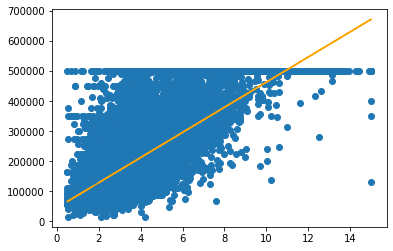

In [32]:
plt.scatter(x_train, y_train)
plt.plot(x_train, lineReg.coef_*x_train + lineReg.intercept_, color='orange')

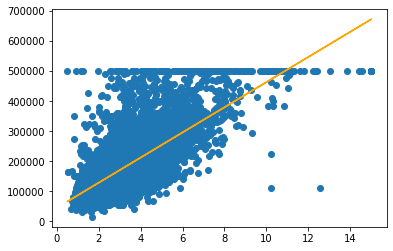

In [33]:
plt.scatter(x_test, y_test)
plt.plot(x_test, lineReg.coef_*x_test + lineReg.intercept_, color='orange')